### Importing the required libraries. 

In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

### Loading the Dataset 

In [28]:
df_train = pd.read_csv('/Users/tania/Downloads/cebd1260/train.csv')
df_test = pd.read_csv('/Users/tania/Downloads/cebd1260/test.csv')
print(df_train.shape, df_test.shape)


(51000, 29) (23111, 28)


### Feature Engineering

In [29]:
print(df_train.columns)

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')


In [30]:
df_train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,13662370,3.806662,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,...,41.849684,-87.676270,Pilsen Arts Community Custom Home,Pilsen,17,97.0,https://a0.muscache.com/im/pictures/81318153/a...,60608,1.0,1.0
1,4765892,4.941642,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,...,34.068613,-118.246455,Apartment 5 minutes from DTLA & Dodger Stadium,Echo Park,2,100.0,https://a0.muscache.com/im/pictures/aa00250e-0...,90012,1.0,1.0
2,21169968,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.701958,-73.917352,"Brand New Huge 2bdr apartment(L,M train 2 min)",Bushwick,25,88.0,https://a0.muscache.com/im/pictures/d9220535-c...,11237,2.0,3.0
3,7939196,4.867534,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,...,40.742959,-73.990820,Grande Super Large APT !!!,Flatiron District,12,82.0,NaN,10010,1.0,3.0
4,18161036,3.663562,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,34.046473,-117.734095,Private Cozy and Clean Rooms in Pomona,NaN,2,100.0,https://a0.muscache.com/im/pictures/e0c9b2f9-a...,91766,1.0,1.0


In [31]:
df_train['AC'] = df_train.amenities.str.extract('(Air conditioning)')
df_test['AC'] = df_test.amenities.str.extract('(Air conditioning)')

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [32]:
df_train['Internet'] = df_train.amenities.str.extract('(Wireless Internet)')
df_test['Internet'] = df_test.amenities.str.extract('(Wireless Internet)')

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [33]:
df_train['Free_Parking'] = df_train.amenities.str.extract('(Free parking)')
df_test['Free_Parking'] = df_test.amenities.str.extract('(Free parking)')

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [34]:
df_train['Pets_allowed'] = df_train.amenities.str.extract('(Pets allowed)')
df_test['Pets_allowed'] = df_test.amenities.str.extract('(Pets allowed)')

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [35]:
df_train['Kitchen'] = df_train.amenities.str.extract('(Kitchen)')
df_test['Kitchen'] = df_test.amenities.str.extract('(Kitchen)')

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [36]:
df_train['AC'] = np.where(df_train['AC'].str.contains("Air conditioning", case=False, na=False), 1, 0)
df_test['AC'] = np.where(df_test['AC'].str.contains("Air conditioning", case=False, na=False), 1, 0)

In [37]:
df_train['Internet'] = np.where(df_train['Internet'].str.contains("Wireless Internet", case=False, na=False), 1, 0)
df_test['Internet'] = np.where(df_test['Internet'].str.contains("Wireless Internet", case=False, na=False), 1, 0)

In [38]:
df_train['Pets_allowed'] = np.where(df_train['Pets_allowed'].str.contains("Pets allowed", case=False, na=False), 1, 0)
df_test['Pets_allowed'] = np.where(df_test['Pets_allowed'].str.contains("Pets allowed", case=False, na=False), 1, 0)

In [39]:
df_train['Free_Parking'] = np.where(df_train['Free_Parking'].str.contains("Free parking", case=False, na=False), 1, 0)
df_test['Free_Parking'] = np.where(df_test['Free_Parking'].str.contains("Free parking", case=False, na=False), 1, 0)

In [40]:
df_train['Kitchen'] = np.where(df_train['Kitchen'].str.contains("Kitchen", case=False, na=False), 1, 0)
df_test['Kitchen'] = np.where(df_test['Kitchen'].str.contains("Kitchen", case=False, na=False), 1, 0)

In [41]:
df_train['cleaning_fee'] = df_train['cleaning_fee'].astype(int)
df_test['cleaning_fee'] = df_test['cleaning_fee'].astype(int)

In [42]:
df_train.sample(100)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,AC,Internet,Free_Parking,Pets_allowed,Kitchen
15176,2606070,3.637586,House,Private room,"{Internet,""Wireless Internet"",Kitchen,Heating,...",1,1.0,Real Bed,strict,1,...,93.0,https://a0.muscache.com/im/pictures/13564036/8...,11226,1.0,1.0,0,1,0,0,1
25745,15182580,4.317488,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",5,1.0,Real Bed,flexible,0,...,100.0,https://a0.muscache.com/im/pictures/bd72e7a0-f...,11385,1.0,2.0,1,1,1,0,1
18982,16326286,5.164786,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,moderate,1,...,100.0,https://a0.muscache.com/im/pictures/df8f2e85-1...,11211.0,1.0,1.0,1,1,0,0,1
748,3643673,6.214608,Loft,Entire home/apt,"{Internet,""Wireless Internet"",""Wheelchair acce...",16,1.0,Real Bed,strict,1,...,100.0,NaN,90021,0.0,1.0,0,1,0,0,1
13269,880102,5.075174,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,2.0,Real Bed,strict,1,...,100.0,https://a0.muscache.com/im/pictures/be19d75f-c...,11201,2.0,2.0,1,1,0,0,1
17271,12401724,4.852030,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",6,1.0,Real Bed,moderate,1,...,NaN,https://a0.muscache.com/im/pictures/55e060b2-d...,90038,1.0,3.0,1,1,1,0,1
44526,1089619,5.164786,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",3,1.0,Real Bed,strict,1,...,100.0,NaN,20001,1.0,2.0,1,1,1,0,1
48872,12934059,3.496508,House,Shared room,"{TV,Internet,""Wireless Internet"",""Air conditio...",1,2.5,Couch,strict,1,...,100.0,https://a0.muscache.com/im/pictures/704ce569-c...,91007,1.0,1.0,1,1,1,1,1
44441,16570249,4.007333,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,strict,1,...,NaN,https://a0.muscache.com/im/pictures/7569cbf4-d...,90027,1.0,1.0,1,1,1,0,1
24763,14935760,4.564348,Apartment,Entire home/apt,"{TV,""Wireless Internet"",Kitchen,Heating,""Famil...",3,1.0,Real Bed,flexible,1,...,90.0,NaN,60657,0.0,1.0,0,1,0,0,1


Selecting the columns and handling the missing values

In [43]:
X_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating','AC', 'Internet', 'cleaning_fee', 'longitude', 'latitude', 'Free_Parking', 'Pets_allowed','Kitchen']
y_column = ['log_price']

In [44]:
# handle missing values
df_train = df_train[X_columns + y_column]
print(df_train.shape)
df_train = df_train.fillna(0.0) 
print(df_train.shape)

(51000, 15)
(51000, 15)


### Model Training

We split the data using SKlearn

In [45]:
threshold = 0.8
X = df_train[X_columns]
y = df_train[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40800, 14)
y_train (40800, 1)
X_test (10200, 14)
y_test (10200, 1)


### Model Evaluation

In [46]:
# Model Training
model = KNeighborsRegressor(n_neighbors=20)
#model.fit(X_train, y_train.ravel())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [47]:
def evaluation_chart(test, pred, title):
    plt.scatter(test, pred, alpha=0.3)
    plt.plot(range(0,5000000, 100), range(0,5000000, 100), '--r', alpha=0.3, label='Line1')
    plt.title(title)
    plt.xlabel('True Value')
    plt.ylabel('Predict Value')
    plt.xlim([0, 5000000])
    plt.ylim([0, 5000000])
    plt.show()

MAE 0.4
RMSE 0.52


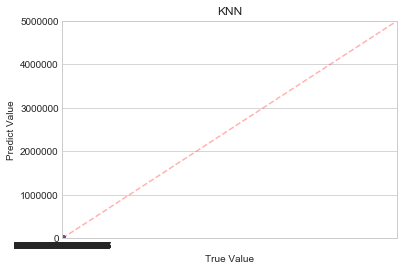

In [48]:
# model evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('MAE', round(mae, 2))
print('RMSE', round(rmse, 2))
evaluation_chart(y_test, y_pred, 'KNN')

### Prepare Submission

In [50]:
df_prediction = df_test[X_columns].fillna(0.0)
df_test['log_price'] = model.predict(df_prediction)
df_test[['id', 'log_price']]

,id,log_price
0,986942,4.757147
1,16436737,4.775836
2,18209634,4.433058
3,15027024,4.576648
4,18074243,5.209500
5,8446914,4.891601
6,19362916,4.825552
7,16116059,5.108500
8,20912583,4.803398
9,13573101,4.804729


In [51]:
df_test[['id', 'log_price']].to_csv('/Users/tania/Downloads/cebd1260/submission_KNN8.csv', index=False)